In [65]:
import awkward as ak
import matplotlib.pyplot as plt
import hist
import numpy as np
import vector


import pylhe

In [111]:
import seaborn as sns
colors = sns.color_palette("colorblind", 8)

In [112]:
colors

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451)]

# Background process p p > t t~

In [5]:
pylhe.register_awkward()
arr_b = pylhe.to_awkward(pylhe.read_lhe_with_attributes("../pptt/Events/run_01/unweighted_events.lhe"))

In [6]:
f = open("../pptt/Events/run_01/unweighted_events.lhe", "r")
content = f.readlines()
f.close() 

line = content[387]
sigma_b = float(line.split(" ")[0]) # cross section in pb
print(sigma_b)

444.7059


In [7]:
lumi = 13.3e3 #luminosity in inverse picobars
NMG = 10000 #number of events generated in madgraph
WW_b = sigma_b*lumi/NMG

In [8]:
print(arr_b.particles.vector[:,-1].pt)
print(arr_b.particles.vector[:,-2].pt)

[117, 441, 39.4, 74.7, 68.4, 66.4, 218, 108, ... 111, 108, 147, 77.2, 74.5, 104, 112]
[117, 441, 39.4, 74.7, 68.4, 66.4, 218, 108, ... 111, 108, 147, 77.2, 74.5, 104, 112]


In [9]:
leading_pt_b = np.zeros(NMG)
for i in range(0,NMG,1):
    leading_pt_b[i] = max(arr_b.particles.vector[i,-1].pt, arr_b.particles.vector[i,-2].pt)


In [10]:
leading_pt_b

array([117.26367681, 441.27809406,  39.42397839, ...,  74.48438355,
       104.11598396, 111.53716723])

# Signal p p > t t~ ax for different couplings

## $c_{a\Phi} =1$

In [12]:
pylhe.register_awkward()
arr_1 = pylhe.to_awkward(pylhe.read_lhe_with_attributes("../ppttax/Events/run_01/unweighted_events.lhe"))

In [13]:
f = open("../ppttax/Events/run_01/unweighted_events.lhe", "r")
content = f.readlines()
f.close() 

line = content[387]
sigma_1 = float(line.split(" ")[0]) # cross section in pb
print(sigma_1)

0.02667609


In [14]:
WW_1 = sigma_1*lumi/NMG

In [15]:
leading_pt_1 = np.zeros(NMG)
for i in range(0,NMG,1):
    leading_pt_1[i] = max(arr_1.particles.vector[i,-2].pt, arr_1.particles.vector[i,-3].pt)

## $c_{a\Phi} = 10$

In [17]:
pylhe.register_awkward()
arr_10 = pylhe.to_awkward(pylhe.read_lhe_with_attributes("../ppttax/Events/run_02/unweighted_events.lhe"))

In [18]:
leading_pt_10 = np.zeros(NMG)
for i in range(0,NMG,1):
    leading_pt_10[i] = max(arr_10.particles.vector[i,-2].pt, arr_10.particles.vector[i,-3].pt)

## $c_{a\Phi} = 100$

In [20]:
pylhe.register_awkward()
arr_100 = pylhe.to_awkward(pylhe.read_lhe_with_attributes("../ppttax/Events/run_06/unweighted_events.lhe"))

In [23]:
leading_pt_100 = np.zeros(NMG)
for i in range(0,NMG,1):
    leading_pt_100[i] = max(arr_100.particles.vector[i,-2].pt, arr_100.particles.vector[i,-3].pt)

## $c_{a\Phi} = 1000$

In [25]:
pylhe.register_awkward()
arr_1000 = pylhe.to_awkward(pylhe.read_lhe_with_attributes("../ppttax/Events/run_03/unweighted_events.lhe"))

In [26]:
leading_pt_1000 = np.zeros(NMG)
for i in range(0,NMG,1):
    leading_pt_1000[i] = max(arr_1000.particles.vector[i,-2].pt, arr_1000.particles.vector[i,-3].pt)

## $c_{a\Phi} = 0.1$

In [28]:
pylhe.register_awkward()
arr_01 = pylhe.to_awkward(pylhe.read_lhe_with_attributes("../ppttax/Events/run_05/unweighted_events.lhe"))

In [29]:
leading_pt_01 = np.zeros(NMG)
for i in range(0,NMG,1):
    leading_pt_01[i] = max(arr_01.particles.vector[i,-2].pt, arr_01.particles.vector[i,-3].pt)

## produce the histograms

In [80]:
num_bins = 50
max_bins = 800

In [81]:
axis1 = hist.axis.Regular(bins=num_bins, start=0, stop=max_bins, name="p_T")
storage = hist.storage.Weight()
hist1 = hist.Hist(axis1, storage=storage)
hist1.fill(leading_pt_b);

In [82]:
axis2 = hist.axis.Regular(bins=num_bins, start=0, stop=max_bins, name="p_T")
storage = hist.storage.Weight()
hist2 = hist.Hist(axis2, storage=storage)
hist2.fill(leading_pt_1);

In [83]:
axis3 = hist.axis.Regular(bins=num_bins, start=0, stop=max_bins, name="p_T")
storage = hist.storage.Weight()
hist3 = hist.Hist(axis3, storage=storage)
hist3.fill(leading_pt_10);

In [84]:
axis4 = hist.axis.Regular(bins=num_bins, start=0, stop=max_bins, name="p_T")
storage = hist.storage.Weight()
hist4 = hist.Hist(axis4, storage=storage)
hist4.fill(leading_pt_100);

In [85]:
axis5 = hist.axis.Regular(bins=num_bins, start=0, stop=max_bins, name="p_T")
storage = hist.storage.Weight()
hist5 = hist.Hist(axis5, storage=storage)
hist5.fill(leading_pt_1000);

In [86]:
axis6 = hist.axis.Regular(bins=num_bins, start=0, stop=max_bins, name="p_T")
storage = hist.storage.Weight()
hist6 = hist.Hist(axis6, storage=storage)
hist6.fill(leading_pt_01);

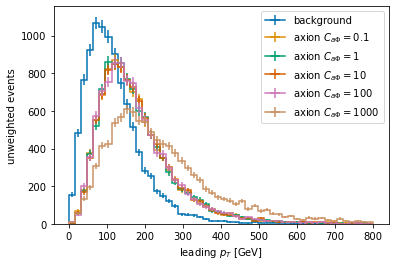

In [115]:
# artists1 = hist1.plot1d(label='background', color = 'blue');
# artists2 = hist6.plot1d(label='axion $C_{a \Phi} = 0.1$', color = 'yellow');
# artists3 = hist2.plot1d(label='axion $C_{a \Phi} = 1$', color = 'red');
# artists4 = hist3.plot1d(label='axion $C_{a \Phi} = 10$', color = 'green');
# artists5 = hist4.plot1d(label='axion $C_{a \Phi} = 100$', color = 'orange');
# artists6 = hist5.plot1d(label='axion $C_{a \Phi} = 1000$', color = 'purple');
artists1 = hist1.plot1d(label='background', color = colors[0]);
artists2 = hist6.plot1d(label='axion $C_{a \Phi} = 0.1$', color = colors[1]);
artists3 = hist2.plot1d(label='axion $C_{a \Phi} = 1$', color = colors[2]);
artists4 = hist3.plot1d(label='axion $C_{a \Phi} = 10$', color = colors[3]);
artists5 = hist4.plot1d(label='axion $C_{a \Phi} = 100$', color = colors[4]);
artists6 = hist5.plot1d(label='axion $C_{a \Phi} = 1000$', color = colors[5]);
ax = artists1[0].stairs.axes;
ax.set_yscale("linear");
ax.set_xlabel("leading $p_T$ [GeV]");
ax.set_ylabel("unweighted events");
ax.legend()

# Signal p p > t t~ ax for different axion masses (default $m_a = 1$ MeV)

## $m_a = 1$ GeV

In [95]:
pylhe.register_awkward()
arr_M1GeV = pylhe.to_awkward(pylhe.read_lhe_with_attributes("../ppttax/Events/run_04/unweighted_events.lhe"))

In [96]:
leading_pt_M1GeV = np.zeros(NMG)
for i in range(0,NMG,1):
    leading_pt_M1GeV[i] = max(arr_M1GeV.particles.vector[i,-2].pt, arr_M1GeV.particles.vector[i,-3].pt)

## $m_a = 1$ keV

In [100]:
pylhe.register_awkward()
arr_M1keV = pylhe.to_awkward(pylhe.read_lhe_with_attributes("../ppttax/Events/run_07/unweighted_events.lhe"))

In [101]:
leading_pt_M1keV = np.zeros(NMG)
for i in range(0,NMG,1):
    leading_pt_M1keV[i] = max(arr_M1keV.particles.vector[i,-2].pt, arr_M1keV.particles.vector[i,-3].pt)

## $m_a = 1$ TeV

In [102]:
pylhe.register_awkward()
arr_M1TeV = pylhe.to_awkward(pylhe.read_lhe_with_attributes("../ppttax/Events/run_08/unweighted_events.lhe"))

In [103]:
leading_pt_M1TeV = np.zeros(NMG)
for i in range(0,NMG,1):
    leading_pt_M1TeV[i] = max(arr_M1TeV.particles.vector[i,-2].pt, arr_M1TeV.particles.vector[i,-3].pt)

## produce the histograms

In [93]:
num_bins = 50
max_bins = 800

In [104]:
axis7 = hist.axis.Regular(bins=num_bins, start=0, stop=max_bins, name="p_T")
storage = hist.storage.Weight()
hist7 = hist.Hist(axis7, storage=storage)
hist7.fill(leading_pt_M1GeV);

In [105]:
axis8 = hist.axis.Regular(bins=num_bins, start=0, stop=max_bins, name="p_T")
storage = hist.storage.Weight()
hist8 = hist.Hist(axis8, storage=storage)
hist8.fill(leading_pt_M1keV);

In [106]:
axis9 = hist.axis.Regular(bins=num_bins, start=0, stop=max_bins, name="p_T")
storage = hist.storage.Weight()
hist9 = hist.Hist(axis9, storage=storage)
hist9.fill(leading_pt_M1TeV);

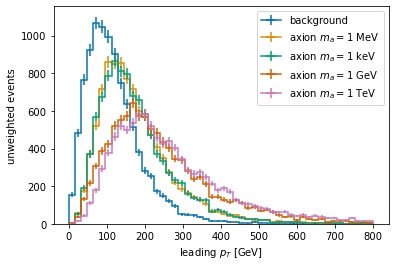

In [116]:
# artists1 = hist1.plot1d(label='background', color = 'blue');
# artists2 = hist2.plot1d(label='axion $m_a = 1$ MeV', color = 'yellow');
# artists7 = hist8.plot1d(label='axion $m_a = 1$ keV', color = 'red');
# artists8 = hist7.plot1d(label='axion $m_a = 1$ GeV', color = 'green');
# artists9 = hist9.plot1d(label='axion $m_a = 1$ TeV', color = 'purple');
artists1 = hist1.plot1d(label='background', color = colors[0]);
artists2 = hist2.plot1d(label='axion $m_a = 1$ MeV', color = colors[1]);
artists7 = hist8.plot1d(label='axion $m_a = 1$ keV', color = colors[2]);
artists8 = hist7.plot1d(label='axion $m_a = 1$ GeV', color = colors[3]);
artists9 = hist9.plot1d(label='axion $m_a = 1$ TeV', color = colors[4]);
ax = artists1[0].stairs.axes;
ax.set_yscale("linear");
ax.set_xlabel("leading $p_T$ [GeV]");
ax.set_ylabel("unweighted events");
ax.legend()